In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/online_retail_II.csv')

df.head(), df.shape

(  Invoice StockCode                          Description  Quantity  \
 0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
 1  489434    79323P                   PINK CHERRY LIGHTS        12   
 2  489434    79323W                  WHITE CHERRY LIGHTS        12   
 3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
 4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
 
            InvoiceDate  Price  Customer ID         Country  
 0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
 1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
 4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  ,
 (1067371, 8))

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  str    
 1   StockCode    1067371 non-null  str    
 2   Description  1062989 non-null  str    
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  str    
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 65.1 MB


In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.150000e+00,16797.000000,NaN


In [6]:
df[df['Quantity'] < 0].shape

(22950, 8)

In [7]:
df[df['Price'] <= 0].shape

(6207, 8)

In [8]:
df['Customer ID'].isna().sum()

np.int64(243007)

In [9]:
df['Customer ID'].isna().mean()

np.float64(0.22766872999172733)

In [10]:
df_clean = df.copy()

In [11]:
df_clean = df_clean[
    (df_clean['Quantity'] > 0) &
    (df_clean['Price'] > 0) &
    (df_clean['Customer ID'].notna())
]

In [12]:
df.shape, df_clean.shape

((1067371, 8), (805549, 8))

In [13]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [14]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  str           
 1   StockCode    805549 non-null  str           
 2   Description  805549 non-null  str           
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[us]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), str(4)
memory usage: 55.3 MB


In [15]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['Price']

In [16]:
df_clean[['Quantity', 'Price', 'Revenue']].head()

,Quantity,Price,Revenue
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [17]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

In [18]:
df_clean[['InvoiceDate', 'InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
0,2009-12-01 07:45:00,2009-12
1,2009-12-01 07:45:00,2009-12
2,2009-12-01 07:45:00,2009-12
3,2009-12-01 07:45:00,2009-12
4,2009-12-01 07:45:00,2009-12


In [19]:
first_purchase = (
    df_clean
    .groupby('Customer ID')['InvoiceDate']
    .min()
    .reset_index()
    .rename(columns={'InvoiceDate': 'FirstPurchaseDate'})
)

first_purchase.head()

,Customer ID,FirstPurchaseDate
0,12346.0,2009-12-14 08:34:00
1,12347.0,2010-10-31 14:20:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-04-29 13:20:00
4,12350.0,2011-02-02 16:01:00


In [20]:
first_purchase['CohortMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')
first_purchase.head()

,Customer ID,FirstPurchaseDate,CohortMonth
0,12346.0,2009-12-14 08:34:00,2009-12
1,12347.0,2010-10-31 14:20:00,2010-10
2,12348.0,2010-09-27 14:59:00,2010-09
3,12349.0,2010-04-29 13:20:00,2010-04
4,12350.0,2011-02-02 16:01:00,2011-02


In [21]:
df_clean = df_clean.merge(first_purchase, on='Customer ID', how='left')

In [22]:
df_clean[['Customer ID', 'InvoiceMonth', 'CohortMonth']].head()

,Customer ID,InvoiceMonth,CohortMonth
0,13085.0,2009-12,2009-12
1,13085.0,2009-12,2009-12
2,13085.0,2009-12,2009-12
3,13085.0,2009-12,2009-12
4,13085.0,2009-12,2009-12


In [23]:
df_clean['CohortIndex'] = (
    df_clean['InvoiceMonth'].astype(int)
    - df_clean['CohortMonth'].astype(int)
)

In [24]:
df_clean[['InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()

,InvoiceMonth,CohortMonth,CohortIndex
0,2009-12,2009-12,0
1,2009-12,2009-12,0
2,2009-12,2009-12,0
3,2009-12,2009-12,0
4,2009-12,2009-12,0


In [25]:
cohort_data = (
    df_clean
    .groupby(['CohortMonth', 'CohortIndex'])['Customer ID']
    .nunique()
    .reset_index()
)

cohort_data.head()

,CohortMonth,CohortIndex,Customer ID
0,2009-12,0,955
1,2009-12,1,337
2,2009-12,2,319
3,2009-12,3,406
4,2009-12,4,363


In [26]:
cohort_table = cohort_data.pivot(
    index='CohortMonth',
    columns='CohortIndex',
    values='Customer ID'
)

cohort_table.head()

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN


In [27]:
cohort_size = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_size, axis=0)

In [28]:
retention = retention.round(3)
retention.head()

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.353,0.334,0.425,0.380,0.359,0.377,0.342,0.336,0.362,...,0.303,0.263,0.303,0.283,0.260,0.255,0.315,0.305,0.407,0.197
2010-01,1.0,0.206,0.311,0.305,0.264,0.300,0.258,0.230,0.279,0.319,...,0.151,0.235,0.198,0.185,0.196,0.243,0.193,0.245,0.057,NaN
2010-02,1.0,0.238,0.225,0.291,0.246,0.201,0.193,0.286,0.254,0.275,...,0.201,0.160,0.163,0.144,0.230,0.230,0.163,0.059,NaN,NaN
2010-03,1.0,0.190,0.230,0.242,0.233,0.203,0.246,0.302,0.275,0.108,...,0.169,0.174,0.156,0.176,0.201,0.212,0.079,NaN,NaN,NaN
2010-04,1.0,0.194,0.194,0.163,0.184,0.224,0.276,0.262,0.105,0.109,...,0.156,0.139,0.150,0.180,0.224,0.058,NaN,NaN,NaN,NaN


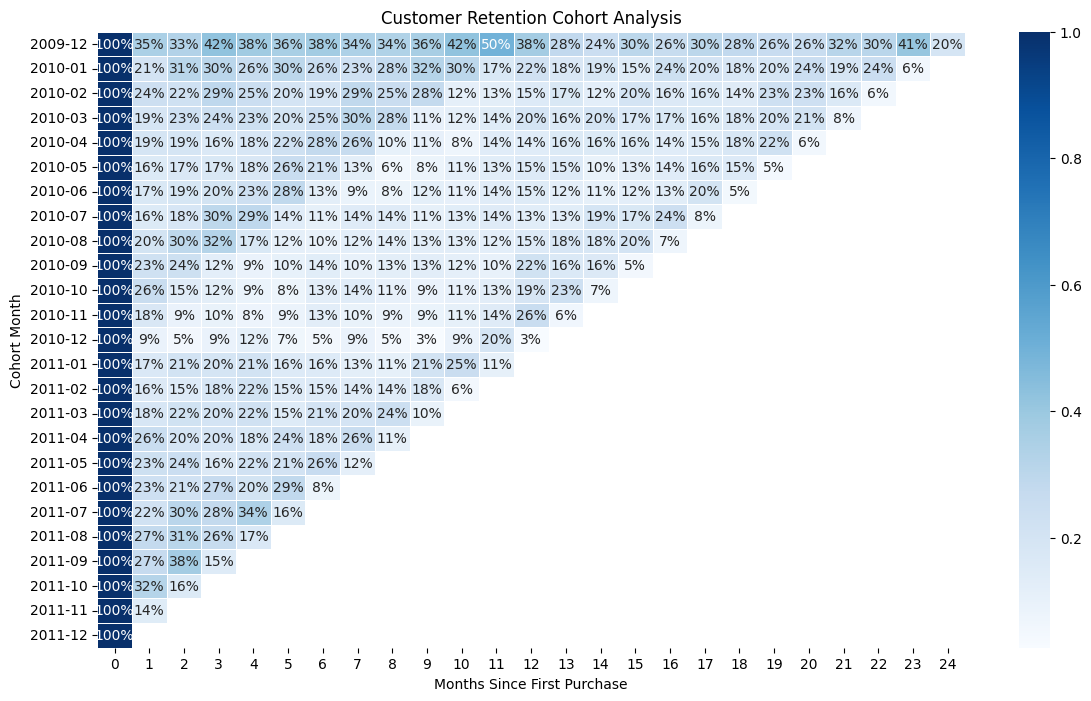

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.heatmap(
    retention,
    annot=True,
    fmt='.0%',
    cmap='Blues',
    linewidths=0.5
)

plt.title('Customer Retention Cohort Analysis')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

In [30]:
revenue_cohort = (
    df_clean
    .groupby(['CohortMonth', 'CohortIndex'])['Revenue']
    .sum()
    .reset_index()
)

revenue_cohort.head()

,CohortMonth,CohortIndex,Revenue
0,2009-12,0,686654.160
1,2009-12,1,395425.571
2,2009-12,2,296802.132
3,2009-12,3,379654.490
4,2009-12,4,306885.820


In [31]:
revenue_table = revenue_cohort.pivot(
    index='CohortMonth',
    columns='CohortIndex',
    values='Revenue'
)

revenue_table.head()

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,686654.160,395425.571,296802.132,379654.490,306885.82,305953.89,302857.56,313502.730,332498.84,392636.02,...,256994.42,163344.301,286620.04,280293.63,254570.15,274325.52,376913.091,415966.24,448001.43,163891.22
2010-01,161893.491,39134.050,51120.260,57728.651,58860.36,61177.15,52107.80,48190.320,60603.94,74792.12,...,31078.22,49938.830,40971.45,47811.51,42713.24,59232.51,59964.440,58715.02,8825.86,NaN
2010-02,170434.884,33367.180,54886.300,53395.920,44024.54,39778.48,40163.19,51343.831,53038.30,54936.22,...,38057.69,30056.580,33408.22,25525.65,45506.54,46046.54,38698.170,11147.57,NaN,NaN
2010-03,235467.061,50007.690,51969.270,64790.790,50453.16,56065.12,65617.17,81628.970,76825.21,35244.78,...,31838.17,42854.240,50034.40,47470.24,57506.93,62626.44,17308.240,NaN,NaN,NaN
2010-04,125100.731,19036.350,20714.240,30117.850,22309.96,30846.57,35241.40,32775.000,15337.20,17697.92,...,22476.17,17874.390,19423.66,32172.93,30079.20,4942.97,NaN,NaN,NaN,NaN


In [32]:
revenue_retention = revenue_table.divide(revenue_table.iloc[:, 0], axis=0)
revenue_retention = revenue_retention.round(3)

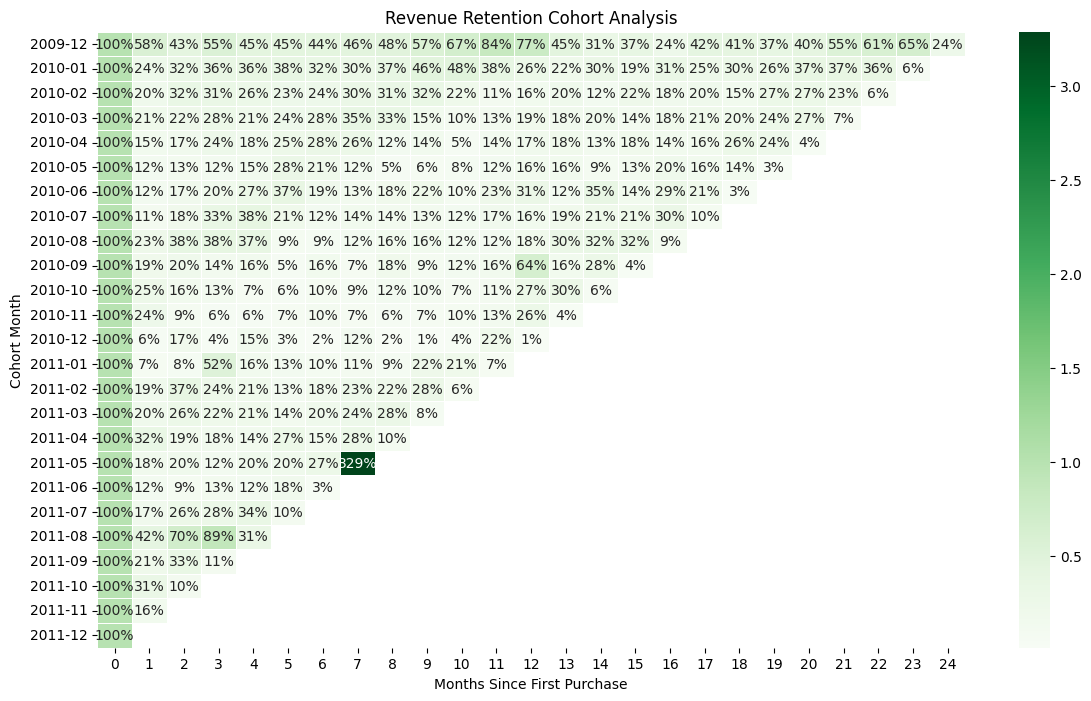

In [33]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    revenue_retention,
    annot=True,
    fmt='.0%',
    cmap='Greens',
    linewidths=0.5
)

plt.title('Revenue Retention Cohort Analysis')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

In [34]:
df_clean[
    (df_clean['CohortMonth'] == '2011-05') &
    (df_clean['CohortIndex'] == 7)
][['Customer ID', 'Revenue']].groupby('Customer ID').sum().sort_values(by='Revenue', ascending=False).head()

,Revenue
Customer ID,
16446.0,168469.60
12700.0,1314.75
15187.0,832.48
15907.0,437.93
14397.0,429.20


In [35]:
cohort_revenue_total = (
    df_clean
    .groupby('CohortMonth')['Revenue']
    .sum()
)

In [36]:
cohort_customers = (
    df_clean
    .groupby('CohortMonth')['Customer ID']
    .nunique()
)

In [37]:
ltv_cohort = (cohort_revenue_total / cohort_customers).round(2)

In [38]:
ltv_df = ltv_cohort.reset_index()
ltv_df.columns = ['CohortMonth', 'LTV']
ltv_df.head()

,CohortMonth,LTV
0,2009-12,9133.79
1,2010-01,3472.08
2,2010-02,2681.25
3,2010-03,2857.04
4,2010-04,1906.95


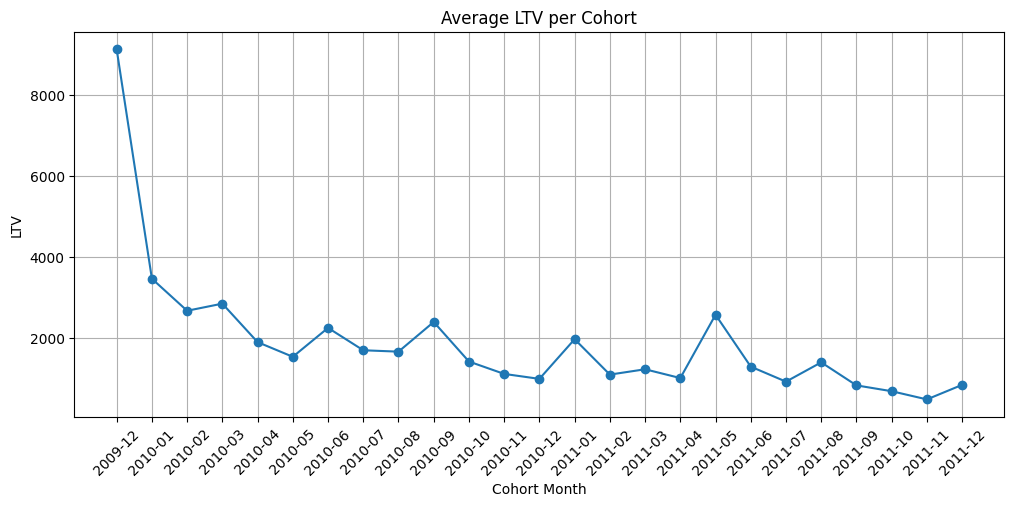

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(ltv_df['CohortMonth'].astype(str), ltv_df['LTV'], marker='o')
plt.xticks(rotation=45)
plt.title('Average LTV per Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('LTV')
plt.grid(True)
plt.show()

## 🔄 Cohort Data Rebuild (Clean Architecture)

The initial cohort datasets were deprecated due to granularity issues that caused revenue overcounting in BI tools.

From this point forward, cohort datasets are rebuilt with:
- strict cohort-level aggregation
- no duplicated customer-month records
- BI-safe granularity for KPI computation

In [ ]:
df_clean.info()

<class 'pandas.DataFrame'>
RangeIndex: 805549 entries, 0 to 805548
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            805549 non-null  str           
 1   StockCode          805549 non-null  str           
 2   Description        805549 non-null  str           
 3   Quantity           805549 non-null  int64         
 4   InvoiceDate        805549 non-null  datetime64[us]
 5   Price              805549 non-null  float64       
 6   Customer ID        805549 non-null  float64       
 7   Country            805549 non-null  str           
 8   Revenue            805549 non-null  float64       
 9   InvoiceMonth       805549 non-null  period[M]     
 10  FirstPurchaseDate  805549 non-null  datetime64[us]
 11  CohortMonth        805549 non-null  period[M]     
 12  CohortIndex        805549 non-null  int64         
dtypes: datetime64[us](2), float64(3), int64(2), period[M](2

In [ ]:
cohort_metrics = (
    df_clean
    .groupby(['CohortMonth', 'CohortIndex'])
    .agg(
        Customers=('Customer ID', 'nunique'),
        Revenue=('Revenue', 'sum')
    )
    .reset_index()
)

In [ ]:
cohort_metrics.head()
cohort_metrics.shape
cohort_metrics.describe()

,CohortIndex,Customers,Revenue
count,325.000000,325.000000,325.000000
mean,8.000000,78.753846,54595.166702
std,6.009252,103.596205,96410.123250
min,0.000000,2.000000,485.130000
25%,3.000000,25.000000,10963.290000
50%,7.000000,41.000000,22223.680000
75%,12.000000,84.000000,47391.320000
max,24.000000,955.000000,686654.160000


In [ ]:
cohort_size = (
    cohort_metrics
    [cohort_metrics['CohortIndex'] == 0]
    [['CohortMonth', 'Customers']]
    .rename(columns={'Customers': 'CohortSize'})
)

In [ ]:
cohort_size.head()

,CohortMonth,CohortSize
0,2009-12,955
25,2010-01,383
49,2010-02,374
72,2010-03,443
94,2010-04,294


In [ ]:
cohort_size.shape

(25, 2)

In [ ]:
cohort_metrics = cohort_metrics.merge(
    cohort_size,
    on='CohortMonth',
    how='left'
)

cohort_metrics['RetentionRate'] = (
    cohort_metrics['Customers'] / cohort_metrics['CohortSize']
)

In [ ]:
cohort_metrics['RetentionRate'].describe()

count    325.000000
mean       0.246889
std        0.231076
min        0.026316
25%        0.129630
50%        0.182796
75%        0.255385
max        1.000000
Name: RetentionRate, dtype: float64

In [ ]:
cohort_retention = cohort_metrics[
    ['CohortMonth', 'CohortIndex', 'Customers', 'CohortSize', 'RetentionRate']
].copy()

In [ ]:
cohort_revenue = cohort_metrics[
    ['CohortMonth', 'CohortIndex', 'Revenue', 'CohortSize']
].copy()

In [ ]:
ltv_cohort = (
    cohort_metrics
    .groupby('CohortMonth')
    .agg(
        TotalRevenue=('Revenue', 'sum'),
        CohortSize=('CohortSize', 'first')
    )
    .reset_index()
)

ltv_cohort['LTV'] = (
    ltv_cohort['TotalRevenue'] / ltv_cohort['CohortSize']
)

In [ ]:
ltv_cohort.describe()

,TotalRevenue,CohortSize,LTV
count,2.500000e+01,25.000000,25.000000
mean,7.097372e+05,235.120000,1905.056359
std,1.707140e+06,187.218749,1684.236137
min,2.384409e+04,28.000000,492.822827
25%,1.405067e+05,108.000000,1019.563208
50%,2.708004e+05,189.000000,1427.629416
75%,5.606441e+05,294.000000,2258.547370
max,8.722766e+06,955.000000,9133.786761


In [ ]:
cohort_retention.to_csv('../data/processed/cohort_retention.csv', index=False)
cohort_revenue.to_csv('../data/processed/cohort_revenue.csv', index=False)
ltv_cohort.to_csv('../data/processed/ltv_cohort.csv', index=False)

In [ ]:
import os
os.listdir('../data/processed')

['ltv_cohort.csv', 'cohort_retention.csv', 'cohort_revenue.csv']

In [ ]:
cohort_revenue = (
    df_clean
    .groupby(['CohortMonth', 'CohortIndex'])
    .agg(
        Customers=('Customer ID', 'nunique'),
        Revenue=('Revenue', 'sum')
    )
    .reset_index()
)